# Classification in Practice

In this laboratory session we will gain some experience working with linear models for **classification** (we already saw how to do regression in a previous lab).

We will follow the same general structure... with one exception -- for this laboratory we will begin with **synthetic** datasets. 

## Part 1: Working with Synthetic Classification Problems

Generating synthetic datasets allows us to gain insight into how classifiers work. We will use some functionality of Scikit-learn to generate -- in a controlled manner -- synthetic classification problems of with various characteristics.

**Note**: When working with these synthetic datasets we will *not* go to the trouble of generating train/test splits -- we are only interested in studying how classifiers work to **separate** the training data.

### Exercise 1.1: Generating a dataset

First, have a look at the documentation for [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). This is one of the easiest ways to generate /simple/ classification problems. Study the documentation and then use `make_blobs` to generate an **EASY** dataset for a **two-class** classification problem with 100 samples per class and 2 input features. What does **EASY** mean? How can we determine, qualitatively, that the randomly generated dataset is "easy"?

**Hint**: You will probably want to develop a *visualization* for datasets, and then *abstract* it into a function you can call later for other datasets. 

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

(Xs_easy, ys_easy) = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)

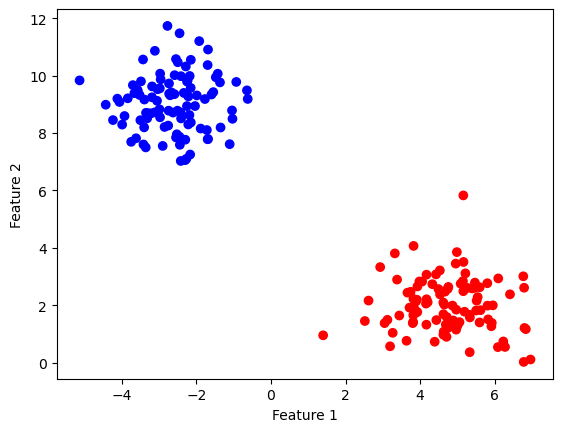

In [2]:
def plot_blobs(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_blobs(Xs_easy, ys_easy)

### Exercise 1.2: "Solving" the dataset

Train a classifier that is *perfectly* classifies the dataset you created above. Any of the the three classifiers mentioned in the *Capsule Lecture* should do well. Try one, or try all three. Be sure to verify that the classifier does *indeed* classify all training points correctly.

**Hint**: You might want to look at [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for this.

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
svc = LinearSVC()

lda.fit(Xs_easy, ys_easy)
qda.fit(Xs_easy, ys_easy)
svc.fit(Xs_easy, ys_easy)

lda_predictions = lda.predict(Xs_easy)
qda_predictions = qda.predict(Xs_easy)
svc_predictions = svc.predict(Xs_easy)

lda_report = classification_report(ys_easy, lda_predictions)
qda_report = classification_report(ys_easy, qda_predictions)
svc_report = classification_report(ys_easy, svc_predictions)

print("Linear Discriminant Analysis (LDA) Report:")
print(lda_report)
print("\nQuadratic Discriminant Analysis (QDA) Report:")
print(qda_report)
print("\nLinear Support Vector Classifier (LinearSVC) Report:")
print(svc_report)

Linear Discriminant Analysis (LDA) Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Quadratic Discriminant Analysis (QDA) Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Linear Support Vector Classifier (LinearSVC) Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                          

### Exercise 1.3: Visualizing the decision surfaces

One of the best ways to understand how a classifier works is to visualize the decision boundaries. Use [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to create a visualization of the *dataset* and the *decision boundaries* for your classifier.

**Note**: This is another great opportunity to apply *functional abstraction* and make a **reusable** visualization that you can reuse (for example in the next exercise).

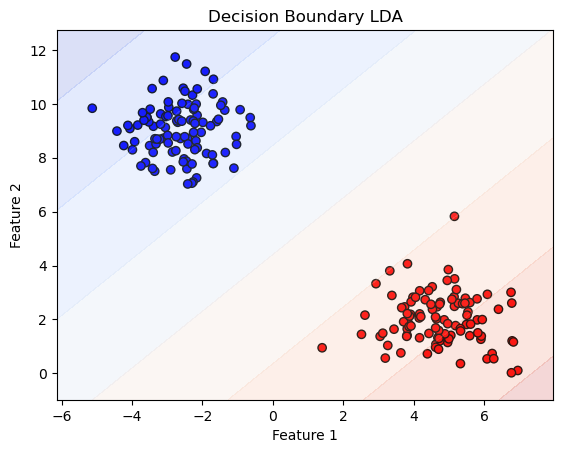

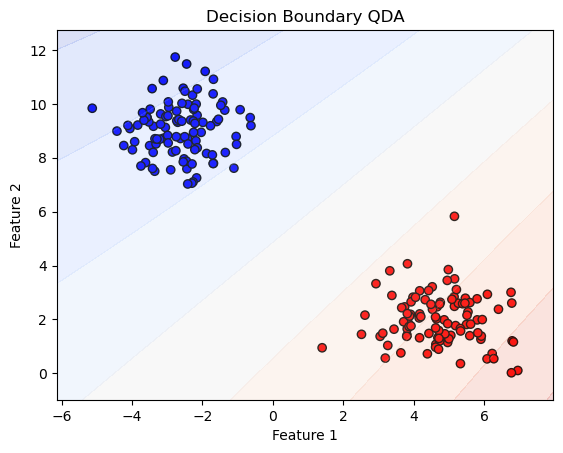

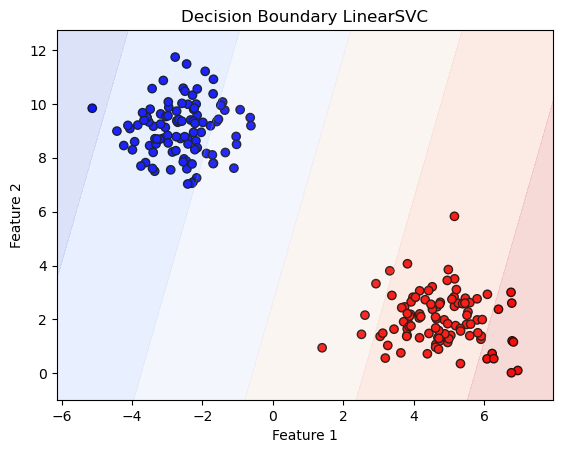

In [4]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundary(X, y, model, title):

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')

    DecisionBoundaryDisplay.from_estimator(model, X, cmap='coolwarm', alpha=0.2, ax=plt.gca())
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

plot_decision_boundary(Xs_easy, ys_easy, lda, 'Decision Boundary LDA')
plot_decision_boundary(Xs_easy, ys_easy, qda, 'Decision Boundary QDA')
plot_decision_boundary(Xs_easy, ys_easy, svc, 'Decision Boundary LinearSVC')

### Exercise 1.4: A harder dataset

Repeat the exercises above, but first generate a **hard** dataset that is not linearly separable. Observe how linear classifiers fail to correctly classify the training data. How can we make these classifiers capable of "solving" this harder dataset?

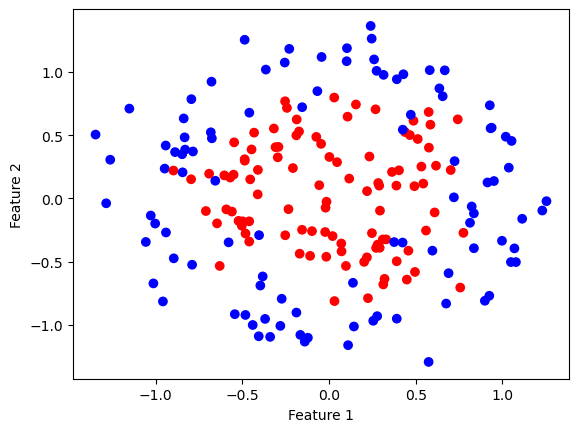

In [5]:
from sklearn.datasets import make_circles

X_difficult, y_difficult = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42)

plot_blobs(X_difficult, y_difficult)

Linear Discriminant Analysis (LDA) Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       100
           1       0.52      0.53      0.53       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200


Quadratic Discriminant Analysis (QDA) Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       100
           1       0.88      0.87      0.87       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200


Linear Support Vector Classifier (LinearSVC) Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       100
           1       0.52      0.53      0.53       100

    accuracy                          

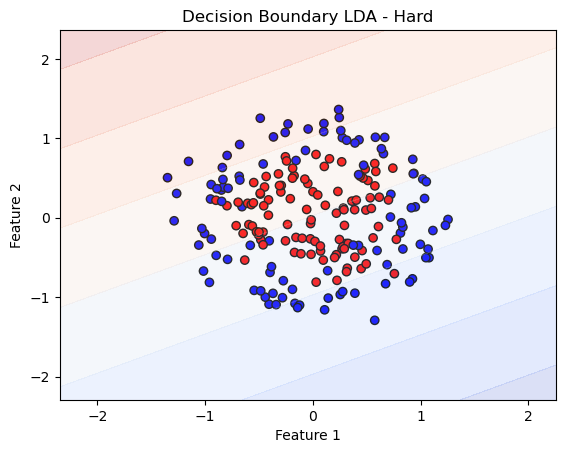

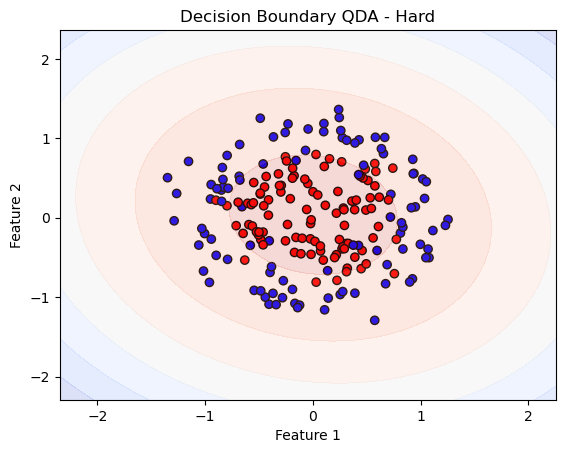

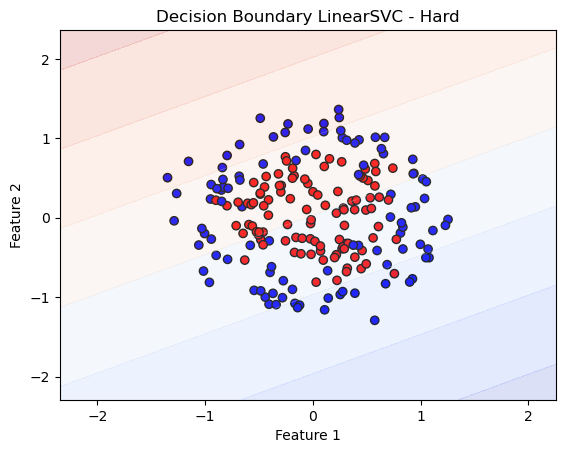

In [6]:
lda_difficult = LinearDiscriminantAnalysis()
qda_difficult = QuadraticDiscriminantAnalysis()
svc_difficult = LinearSVC()

lda_difficult.fit(X_difficult, y_difficult)
qda_difficult.fit(X_difficult, y_difficult)
svc_difficult.fit(X_difficult, y_difficult)

lda_difficult_predictions = lda_difficult.predict(X_difficult)
qda_difficult_predictions = qda_difficult.predict(X_difficult)
svc_difficult_predictions = svc_difficult.predict(X_difficult)

lda_difficult_report = classification_report(y_difficult, lda_difficult_predictions)
qda_difficult_report = classification_report(y_difficult, qda_difficult_predictions)
svc_difficult_report = classification_report(y_difficult, svc_difficult_predictions)

print("Linear Discriminant Analysis (LDA) Report:")
print(lda_difficult_report)
print("\nQuadratic Discriminant Analysis (QDA) Report:")
print(qda_difficult_report)
print("\nLinear Support Vector Classifier (LinearSVC) Report:")
print(svc_difficult_report)

plot_decision_boundary(X_difficult, y_difficult, lda_difficult, 'Decision Boundary LDA - Hard')
plot_decision_boundary(X_difficult, y_difficult, qda_difficult, 'Decision Boundary QDA - Hard')
plot_decision_boundary(X_difficult, y_difficult, svc_difficult, 'Decision Boundary LinearSVC - Hard')

*LDA* e *LinearSVC* hanno una bassa accuratezza, circa del 53%. Questo perchè questi classificatori sono lineari e non riescono a catturare il pattern circolare nei dati.
*QDA* invece ha un'accuratezza molto più alta, circa del 88%, poiché può modellare confini decisionali non lineari, si adatta quindi meglio alla struttura dei dati.
Per migliorare i classificatori lineari su dati non linearmente separabili, si possono applicare trasformazioni delle caratteristiche. Una tecnica comune è ad esempio il Kernel Trick ne nelle SVM che proietta i dati in uno spazio di dimensioni più alte, dove diventano linearmente separabili. 

Proviamo quindi di seguito a fare un test con SVM con kernel rbf:

Support Vector Classifier with RBF Kernel Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       100
           1       0.86      0.91      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



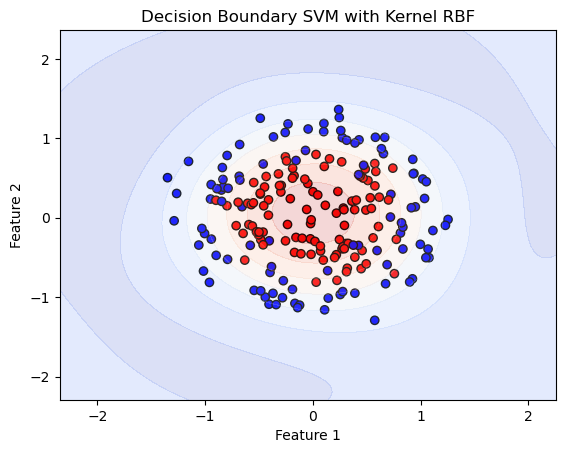

In [7]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel='rbf', gamma='auto')
svc_rbf.fit(X_difficult, y_difficult)

svc_rbf_predictions = svc_rbf.predict(X_difficult)
svc_rbf_report = classification_report(y_difficult, svc_rbf_predictions)

print("Support Vector Classifier with RBF Kernel Report:")
print(svc_rbf_report)

plot_decision_boundary(X_difficult, y_difficult, svc_rbf, 'Decision Boundary SVM with Kernel RBF')

In questo caso abbiamo un'accuratezza del 88%, uguale a quella del QDA, e superiore rispetto ai classificatori lineari. 

Concludiamo quindi col notare come i classificatori non lineari come QDA e SVM con kernel RBF sono molto più efficaci in questi casi.

---
## Part 2: A Real Dataset

In the second set of exercises we will work with a classic dataset for classification: the Iris Flower Classification Dataset. It is a fairly easy dataset to work with since it is low-dimensional and small. We start by loading the dataset, and then proceed with our usual protocol: "playing" with the data, creating train/test splits, and building and evaluating a first classifier. 

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris classification dataset to get started.
ds = load_iris()

# Extract the features (Xs), targets (ys), and class names (labels).
Xs = ds.data
ys = ds.target
classes = ds.target_names

# Make a Pandas DataFrame too, just for shits and giggles.
df = pd.DataFrame(Xs, columns=ds.feature_names)
targets = pd.Series(ds.target)

### Exercise 2.1: Play with the data

Use everything we have learned about *exploratory data analysis* to study the nature and characteristics of this classification problem. Are the classes equally represented? How many features are there in input? **Be creative** and **summarize** your findings with analysis along the way.

In [9]:
df['target'] = targets.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

class_distribution = df['target'].value_counts()
feature_summary = df.describe()

print(f'Class distribution: \n{class_distribution}')

Class distribution: 
target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Notiamo che le classi sono distribuite in modo uniforme

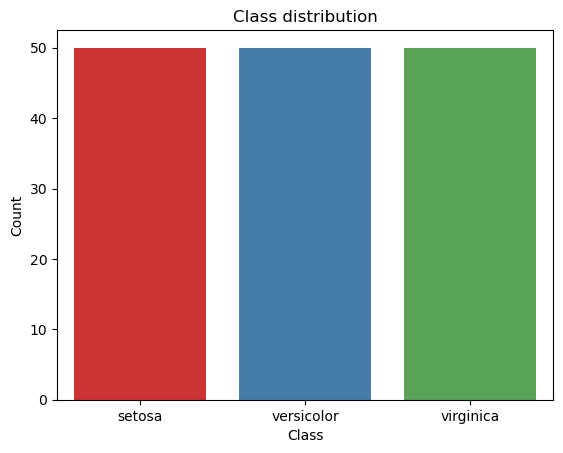

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='target', hue='target', palette='Set1')
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [11]:
feature_summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


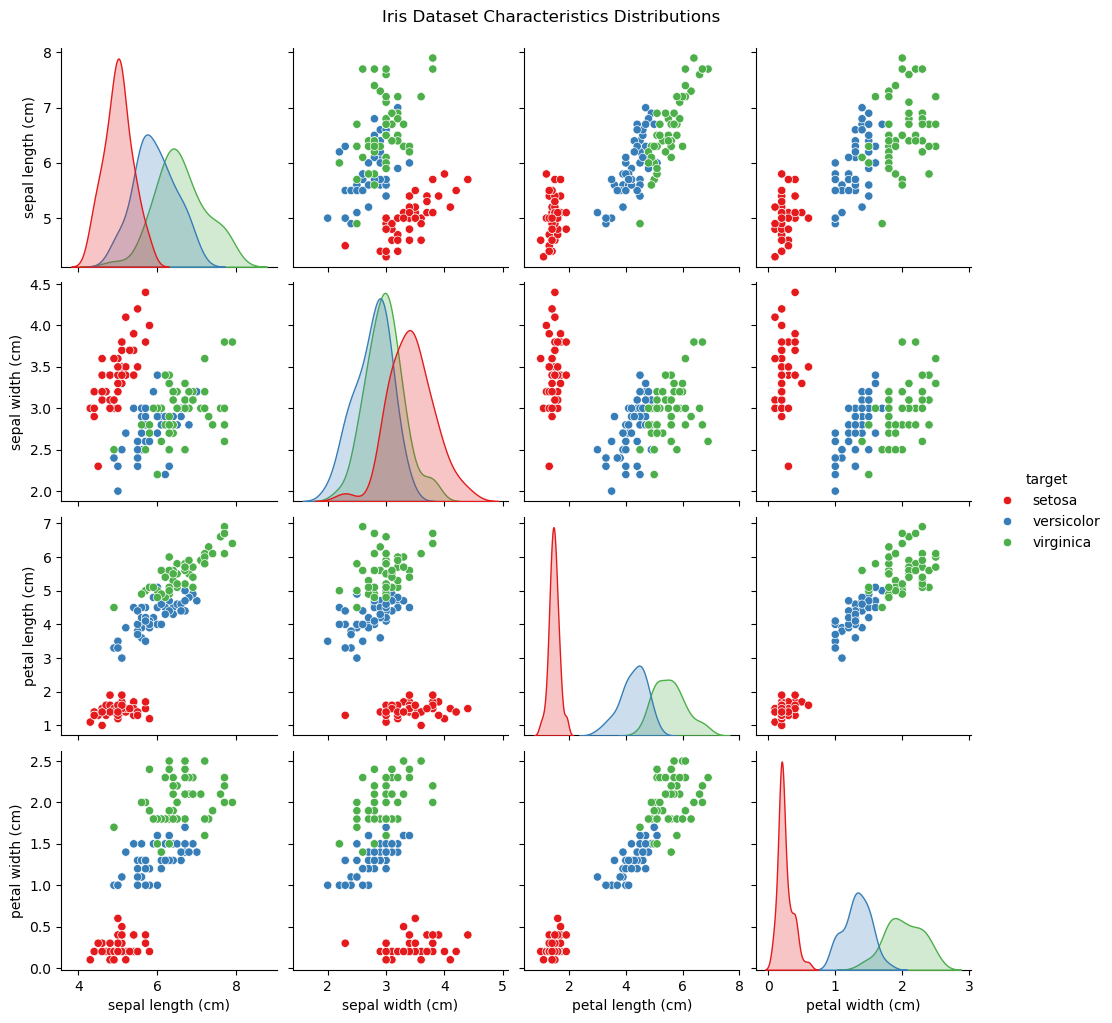

In [12]:
sns.pairplot(df, diag_kind='kde', hue='target', palette='Set1')
plt.suptitle('Iris Dataset Characteristics Distributions', y=1.02)
plt.show()

Nel pairplot sopra riportato possiamo notare che:
* La classe Setosa (in rosso) è chiaramente separata dalle altre due classi per la maggior parte delle caratteristiche
* Le classi Versicolor (in blu) e Virginica (in verde) mostrano una sovrapposizione
* Le combinazioni di petal length e petal width sono efficaci nel separare le classi, questo non accade invece per le combinazioni di sepal length e sepal width

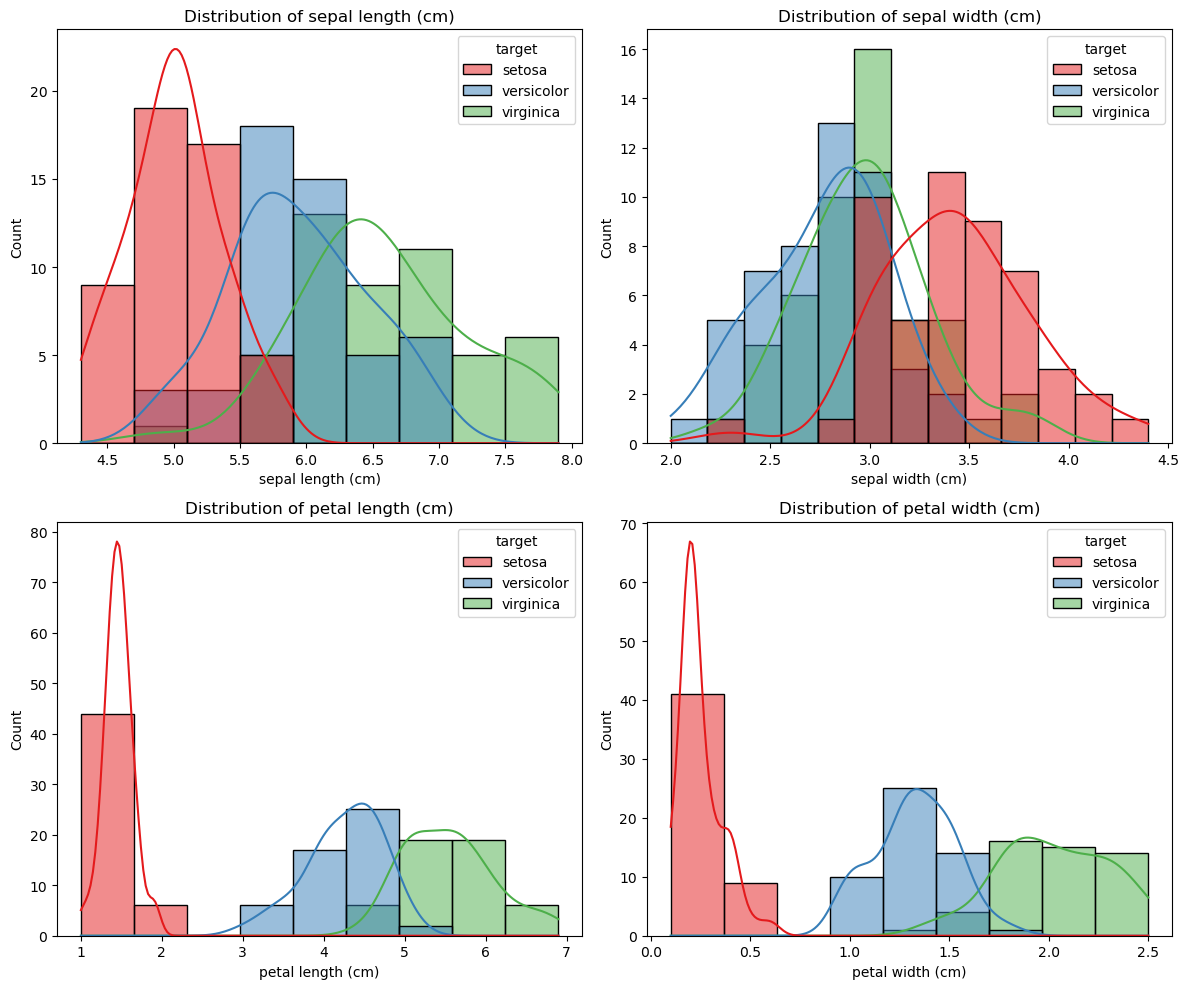

In [13]:
numeric_df = df.drop('target', axis=1)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, column in enumerate(numeric_df.columns):
    sns.histplot(data=df, x=column, hue='target', kde=True, ax=axes[i // 2, i % 2], palette='Set1')
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

I grafici mostrano la distribuzione delle quattro caratteristiche per ciascuna classe:
* Nel pimo grafico (sepal length), le classi hanno distribuzioni parzialmente sovrapposte, mentre nel secondo (sepal width) questo è molto più accentuato.
* Nei grafici "petal length" e "petal width", Setosa è visibilmente separata dalle altre classi, mentre versicolor e virginica si sovrappongono parzialmente. 

In conclusione:
* il dataset è bilanciato con tre classi equamente rappresentate
* ci sono quattro caratteristiche in ingresso
* alcune caratteristiche mostrano buona separabilità tra le classi, mentre altre presentano sovrapposizioni

### Exercise 2.2: Your Turn

Design an experiment to decide which of the three classifiers we have seen performs best on this dataset. Some things to keep in mind:
+ You will probably want to use [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to perform K-fold cross-validation to ensure you are *robustly* estimating performance.
+ All three of the classifier models we have used support **regularization**, which might be an interesting hyperparameter to cross-validate. Unfortunately they use slightly different terminologies:
  + in `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` it is called `shrinkage`
  + in `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis` it is called `reg_param`
  + and in `sklearn.svm.LinearSVC` it is called `C` -- but the regularization performed is 1/C!
  
**Important**: Remember to *document* your findings and analyses along the way. Summarize and justify your final conclusions.

In [14]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV

ds = load_iris()

Xs = ds.data
ys = ds.target

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis(solver='lsqr')
qda = QuadraticDiscriminantAnalysis()
svc = LinearSVC(max_iter=1000000)  

param_grid_lda = {'shrinkage': [None, 'auto']}
param_grid_qda = {'reg_param': [0.0, 0.1, 0.5, 1.0]}
param_grid_svc = {'C': [0.1, 1, 10, 100]}

grid_search_lda = GridSearchCV(lda, param_grid_lda, cv=5, scoring='accuracy')
grid_search_lda.fit(X_train, y_train)
lda_best_score = grid_search_lda.best_score_
lda_best_params = grid_search_lda.best_params_

grid_search_qda = GridSearchCV(qda, param_grid_qda, cv=5, scoring='accuracy')
grid_search_qda.fit(X_train, y_train)
qda_best_score = grid_search_qda.best_score_
qda_best_params = grid_search_qda.best_params_

grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)
svc_best_score = grid_search_svc.best_score_
svc_best_params = grid_search_svc.best_params_

results = {
    'LDA': {'best_score': lda_best_score, 'best_params': lda_best_params},
    'QDA': {'best_score': qda_best_score, 'best_params': qda_best_params},
    'SVC': {'best_score': svc_best_score, 'best_params': svc_best_params}
}

results


{'LDA': {'best_score': 0.975, 'best_params': {'shrinkage': None}},
 'QDA': {'best_score': 0.9666666666666668, 'best_params': {'reg_param': 0.0}},
 'SVC': {'best_score': 0.9583333333333334, 'best_params': {'C': 10}}}

Riassunto dei risultati della cross validation:
* **Linear Discriminant Analysis (LDA):**
    * Miglior Score: *0.975*
    * Migliori Parametri: *{'shrinkage': None}*
* **Quadratic Discriminant Analysis (QDA):**
    * Miglior Score: *0.967*
    * Migliori Parametri: *{'reg_param': 0.0}*
* **Support Vector Classifier (SVC) lineare:**
    * Miglior Score: *0.958*
    * Migliori Parametri: *{'C': 10}*
    
LDA ha quindi ottenuto il miglior punteggio tra i tre classificatori con una precisione del 0.975. Questo suggerisce che LDA è molto efficace in questo caso anche senza l'uso di shrinkage.

QDA ha ottenuto un punteggio molto simile a quello di LDA, quindi anch'esso è molto efficace, ma leggermente meno performante di LDA. Il miglior parametro di regolarizzazione per questo classificatore è 0.0, quindi la regolarizzazione non è necessaria per questo dataset.

Infine SVC ha ottenuto un punteggio leggermente inferiore, con una precisione di 0.958 ma rimane comunque un classificatore molto valido. Il miglior parametro di regolarizzazione è C=10.

*Concliusioni:* LDA sembra essere la scelta migliore dato che ha ottenuto i punteggi più alti e anche grazie alla sua semplicità; inoltre non richiede alcuna regolarizzazione. Un ottima alternativa è QDA, specialmente se occorre gestire confini decisionali non lineari. Anche questo classificatore non richiede regolarizzazione.

---
## Part 3: A Harder Dataset

OK, now let's switch to a the **digits** dataset which should be a bit more challenging. This should be easy by now, and if you have been careful about **functional abstraction** you should be able to reuse much of the functionality from above.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits

ds_digits = load_digits()
df_digits = pd.DataFrame(ds_digits.data)    
targets_digits = pd.Series(ds_digits.target)

### Exercise 3.1: Exploratory data analysis

You know the drill, see what this dataset is made of.

In [16]:
df_digits.columns = [f'pixel_{i}' for i in range(df_digits.shape[1])]
df_digits.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
targets_digits.head()

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [18]:
class_distribution_digits = targets_digits.value_counts()
print(f'Class distributions:\n{class_distribution_digits}')

Class distributions:
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64


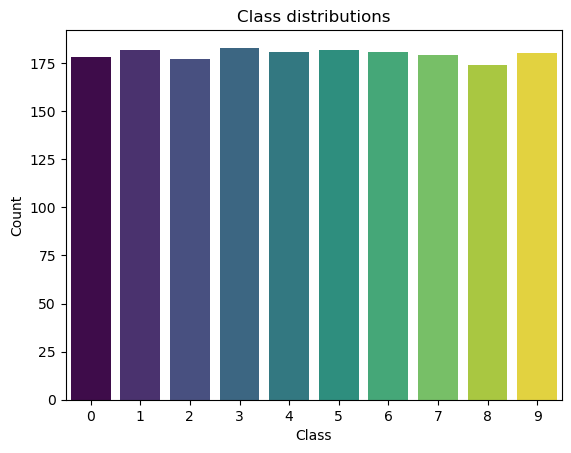

In [19]:
sns.countplot(x=targets_digits, hue=targets_digits, palette='viridis')
plt.title('Class distributions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend([], [], frameon=False)
plt.show()

In [20]:
df_digits.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


### Exercise 3.2: Visualize Some Images

Now we are working with (very small) images. There a useful Matplotlib function for visualizing images is `imshow()`. Use it like this:

 `plt.imshow(df_digits.iloc[0,:].to_numpy().reshape(8,8), cmap='gray')`

 **NOTE**: The Pandas DataFrame structure is kind of getting in our way here -- we have to extract a row, then **convert** it to a numpy array, and then **resize** it to (8,8) to view it.

View some images from the dataset.

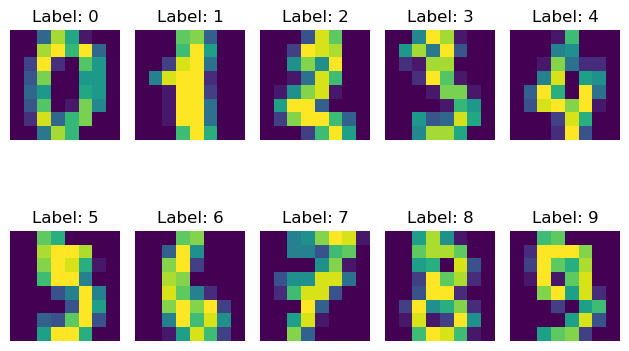

In [21]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(df_digits.iloc[i, :].to_numpy().reshape(8, 8))
    plt.title(f'Label: {targets_digits.iloc[i]}')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

### Exercise 3.3: Find the best classifier (of the three we have seen)

You should now be very familiar with this game and if you consolidated the pieces you used before, this exercise should be easy. As always, document, summarize, and justify your conclusions and analyses.

In [22]:
from sklearn.decomposition import PCA

X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(df_digits, targets_digits, test_size=0.2, random_state=42)

# Riduco la dimensionalità con PCA
pca = PCA(n_components=30) 
X_train_pca = pca.fit_transform(X_train_digits)
X_test_pca = pca.transform(X_test_digits)

lda_digits = LinearDiscriminantAnalysis(solver='lsqr')
qda_digits = QuadraticDiscriminantAnalysis()
svc_digits = SVC(max_iter=1000000)

param_grid_lda_digits = {'shrinkage': [None, 'auto']}
param_grid_qda_digits = {'reg_param': [0.0, 0.1, 0.5, 1.0]}
param_grid_svc_digits = {'C': [0.1, 1, 10, 100]}

grid_search_lda_digits = GridSearchCV(lda_digits, param_grid_lda_digits, cv=5, scoring='accuracy')
grid_search_lda_digits.fit(X_train_pca, y_train_digits)
lda_digits_best_score = grid_search_lda_digits.best_score_
lda_digits_best_params = grid_search_lda_digits.best_params_

grid_search_qda_digits = GridSearchCV(qda_digits, param_grid_qda_digits, cv=5, scoring='accuracy')
grid_search_qda_digits.fit(X_train_pca, y_train_digits)
qda_digits_best_score = grid_search_qda_digits.best_score_
qda_digits_best_params = grid_search_qda_digits.best_params_

grid_search_svc_digits = GridSearchCV(svc_digits, param_grid_svc_digits, cv=5, scoring='accuracy')
grid_search_svc_digits.fit(X_train_pca, y_train_digits)
svc_digits_best_score = grid_search_svc_digits.best_score_
svc_digits_best_params = grid_search_svc_digits.best_params_

results_digits = {
    'LDA': {'best_score': lda_digits_best_score, 'best_params': lda_digits_best_params},
    'QDA': {'best_score': qda_digits_best_score, 'best_params': qda_digits_best_params},
    'SVC': {'best_score': svc_digits_best_score, 'best_params': svc_digits_best_params}
}

results_digits

{'LDA': {'best_score': 0.9526688927603562, 'best_params': {'shrinkage': None}},
 'QDA': {'best_score': 0.9839890631049169, 'best_params': {'reg_param': 0.5}},
 'SVC': {'best_score': 0.9937403213317848, 'best_params': {'C': 10}}}

Riassunto dei risultati della cross validation:
* **Linear Discriminant Analysis (LDA):**
    * Miglior Score: *0.952*
    * Migliori Parametri: *{'shrinkage': None}*
* **Quadratic Discriminant Analysis (QDA):**
    * Miglior Score: *0.984*
    * Migliori Parametri: *{'reg_param': 0.5}*
* **Support Vector Classifier (SVC) con kernel lineare:**
    * Miglior Score: *0.993*
    * Migliori Parametri: *{'C': 10}*
    
Notiamo che il classificatore SVC lineare ha ottenuto il miglior punteggio tra tutti con una precisione del 0.993, con parametro 0.5. Quindi questo risulta essere il migliore, soprattutto dopo la riduzione della dimensionalità con PCA.
QDA ha ottenuto un punteggio molto vicino a quello di SVC, può essere quindi una valida alternativa a SVC.
Infine LDA è quello che ha ottenuto il punteggio peggiore pur da considerarsi comunque un classificatore valido. 

*Conclusioni:* SVC lineare sembra essere la scelta migliore dato che ha ottenuto i punteggi più alti. I restanto due però rimangono comunque ottimi classificatori ottendendo comunque punteggi molto alti.